<a href="https://colab.research.google.com/github/ttsuneoka/GoogleColab/blob/master/Chapter9_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Corelation coefficient0.889:


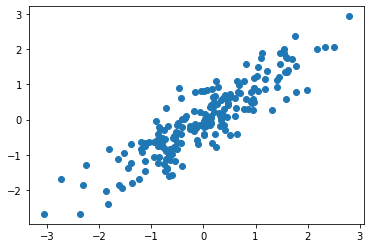

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

sample = np.random.RandomState(1)

X = np.dot(sample.rand(2,2), sample.randn(2, 200)).T

sc = StandardScaler()
X_std = sc.fit_transform(X)

print('Corelation coefficient{:.3f}:'.format(sp.stats.pearsonr(X_std[:, 0], X_std[:, 1])[0]))
plt.scatter(X_std[:, 0], X_std[:, 1])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
print(pca.components_)

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


In [ ]:
print('Variance of each primary component:{}'.format(pca.explained_variance_))

Variance of each primary component:[1.89888438 0.11116588]


In [ ]:
print('Variance ratio of each primary component:{}'.format(pca.explained_variance_ratio_))

Variance ratio of each primary component:[0.94469498 0.05530502]


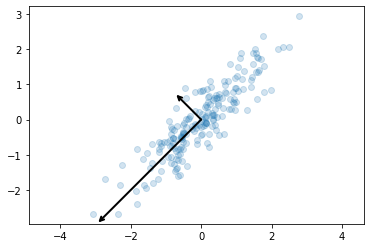

In [ ]:
arrowprops = dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)

def draw_vector(v0, v1):
    plt.gca().annotate('', v1, v0, arrowprops=arrowprops)

plt.scatter(X_std[:, 0], X_std[:, 1], alpha=0.2)

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)

plt.axis('equal'); 